<a href="https://colab.research.google.com/github/takahiromiura/class_data_analysis_II_2025/blob/main/notebooks/IO%E5%87%A6%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データ読み込み/書き込み


データ分析はデータを読み込めなければ始まりません。
分析の結果や中間データを出力すること場合もあります。

データの入出力、または I/O (Input/Output) の処理は `pandas` というライブラリを使うと便利です。
ここでは、`pandas` の中身には深く入らずに進めていきます。

Colab には `pandas` は既にインストールされています。

`pandas` は通常 `pd` と略してインポートされることが多いです。

In [ ]:
import pandas as pd

## Google Colab 内のデータ

Google Colab の左側のフォルダーアイコン📁をクリックすると、初期時点に入っているデータが表示されます (ランタイムを起動する必要あり)。

`sample_data` フォルダーに、以下のファイルが入っているのが確認できます。
各ファイルはダブルクリックをすると開けます。

- `README.md`: サンプルデータの説明ファイル
- `anscombe.json`
- `california_housing_test.csv`
- `california_housing_train.csv`
- `mnist_test.csv`
- `mnist_train.csv`

フォルダーが開いているアイコンをクリックすると、上の階層のフォルダに移動します。
移動前のフォルダは `content` という名前のフォルダです。

一定時間が経つと Colab のストレージにあげたデータは削除されるので注意してください。

##### やってみよう

`sample_data` フォルダ内のファイルを Colab 上で開いて、中身を確認してください。
次に、各ファイルをダウンロードして、メモ帳などで開いて中身を確認してください。



## パス

コンピュータ上にあるファイルの置き場所を示す文字列のことを **パス** (path) といいます。
そのうち、ファイルのパスはファイルパス、フォルダのパスはフォルダパスといいます。
また、フォルダのことをディレクトリ (directory) と呼んだりもします。

Google Colab 上のフォルダ・ファイルのパスは、フォルダ・ファイルを右クリック -> `パスをコピー` でコピーできます。
例えば、`california_housing_test.csv` のファイルパスは、`/content/sample_data/california_housing_train.csv` です。
他のファイルのパスもコピーして確認してみましょう。

### 絶対パスと相対パス

パスの記述方法には絶対パス (absolute path) と相対パス (relative path) の 2 つがあります。
相対パスを理解するには、カレントディレクトリ (current directory) という用語が重要です。これは、基点となるディレクトリ (フォルダ) を指し、相対パスはこのフォルダからの相対的な位置のことを指します。
一方、絶対パスはカレントディレクトリによって変化しない、ルートディレクトリ (`/`) からのファイルやフォルダの絶対的な位置を指します。

現実の例で例えると、自宅の隣の家の場所を表す方法として、X 県 Y 市 ~ という住所で示すのは絶対パス的な表記です。
一方で、自宅の隣という表記方法は相対パス的なものです。

この授業ではパスの記述は基本的に絶対パスで行います。

また、カレントディレクトリは変更することができます。
Colab の場合は、`content` フォルダがカレントディレクトリです (絶対パスは `/content`)。
`/content/sample_data/anscombe.json` は カレントディレクトリ `content` の下にあるので、相対パスは `sample_data/anscombe.json` です。

難しく感じる場合、とりえあず Colab の`パスのコピー` を使えば良いでしょう。
以下は、カレントディレクトリを確認するためのコードです。
また、[`pathlib`](https://docs.python.org/ja/3/library/pathlib.html) はパスを扱いやすくするモジュールです。

In [ ]:
from pathlib import Path
print(Path.cwd())

/content


#### 補足: OS による違い

Windows と他の OS ではパスの書き方が少し異なります。
例えば、Windows の絶対パスは `C:~` のようにファイル・フォルダが入っているドライブが基点となります。

## データのアップロード

ファイルが表示されている領域にアップロードしたいファイルをドラッグ & ドロップするか、ファイルタブの左上にある ↑ のアイコンをクリックすると、アップロードするファイルを選択できます。
アップロードしたファイルは `content` フォルダ内にアップロードされます。
ドラッグ & ドロップでアップロードするフォルダを指定することもできます。

##### やってみよう

ダウンロードしたファイルをアップロードしてください。
また、アップロードしたパスがどうなっているか確認してください。

## データの読み込み

`pandas` は数多くのデータ形式の入出力処理に対応しています。
ここでは、よく使われる csv と xlsx のファイル読み込みを行います。
`read_xxx` という関数名が、特定のファイル形式の読み込みに対応しています。

- 読み込み用関数一覧: https://pandas.pydata.org/docs/reference/io.html

### CSV ファイルの読み込み

csv とは、comma separated values の略で、列ごとに値をカンマ `,` で区切って表します。
行ごとにデータが格納されています。
csv ファイルの読み込みには、`read_csv` 関数を用います。

試しに `california_housing_test.csv` をダウンロードして、メモ帳 (Mac ならテキストエディット) で開いてみてください。
最初の行は列 (カラム) の名前を示しています。
データによってはカラム名がないこともあります。

Python でデータを読み込む前に、Colab かメモ帳などで中身を確認しておくことをおすすめします。
開いたときにデータを書き換えないように注意してください。

`read_csv` 関数は、引数としてファイルのパスを指定します。

In [ ]:
pd.read_csv("/content/sample_data/california_housing_train.csv")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


以下のように相対パスでも読み込めます。

In [ ]:
pd.read_csv("sample_data/california_housing_train.csv")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


##### やってみよう

- Moodle の演習データ `sample_data.xlsx` を pandas で読み込んでください。

ヒント：

- `sample_data.xlsx` はエクセル (Excel) 用のファイルです。
- 読み込みに必要な関数は pandas の [ページ]( https://pandas.pydata.org/docs/reference/io.html) から探す。

## データ出力

`pandas` で `read_xxx` 関数で特定のファイルを読み込めたように、`to_xxx` メソッドを用いることで `pandas` のデータ (`DataFrame`) を特定のファイルとして出力できます。

良く用いられるのが、`to_csv` メソッドで、csv 形式のデータファイルに変換してくれます。
メソッドの引数には、出力先のファイルパスを指定します。
拡張子 (`csv`) も忘れずに記載するようにしてください。

以下の例は、作成した `DataFrame` を `sample_output.csv` というファイル名の csv ファイルとして出力しています。
`DataFrame` については、別の資料で説明します。

In [ ]:
test_data = pd.DataFrame({
    '学生ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'クラス': ['A', 'A', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    '教科': ['数学', '国語', '数学', '国語', '数学', '国語', '数学', '国語', '数学', '国語'],
    '点数': [80, 75, 90, 85, 70, 80, 95, 90, 85, 78]
})
test_data

,学生ID,クラス,教科,点数
0,1,A,数学,80
1,2,A,国語,75
2,3,B,数学,90
3,4,B,国語,85
4,5,A,数学,70
5,6,B,国語,80
6,7,A,数学,95
7,8,B,国語,90
8,9,A,数学,85
9,10,B,国語,78


In [ ]:
test_data.to_csv("sample_output.csv")  # csv として出力

カレントディレクトリである `content` フォルダ内に `sample_output.csv` というファイルが作成されていることを確認してください。
インデックスが単なる番号である場合、`index = False` を引数に入れることでインデックスの出力を除外できます。

他に出力できるデータ形式については、pandas のドキュメントを参考にしてください。

- https://pandas.pydata.org/docs/reference/io.html

##### やってみよう

- 先ほど読み込んだ `sample_data.xlsx` を csv 形式で出力してください。

## この授業での達成目標

この授業では、データを加工・整形し、回帰分析やグラフ作成などの分析ができるようになることを目的としています。

以下は、住宅価格データを使用した分析のデモです。

最終的に、こうしたグラフや分析を自分でできるようにするために基本的な文法や知識を身につけていきます。

生成 AI の進歩によってコードの作成は容易になりましたが、自分が何をしたいのか分からなければ役に立ちません。

各コードが何をしているのかを理解しながら、進んでください。

In [ ]:
housing_data = pd.read_csv("/content/sample_data/california_housing_train.csv")

### グラフのデモ

<Axes: title={'center': 'Scatter plot of Median Income vs. Median House Value'}, xlabel='Median Income (in dollars)', ylabel='Median House Value (in dollars)'>

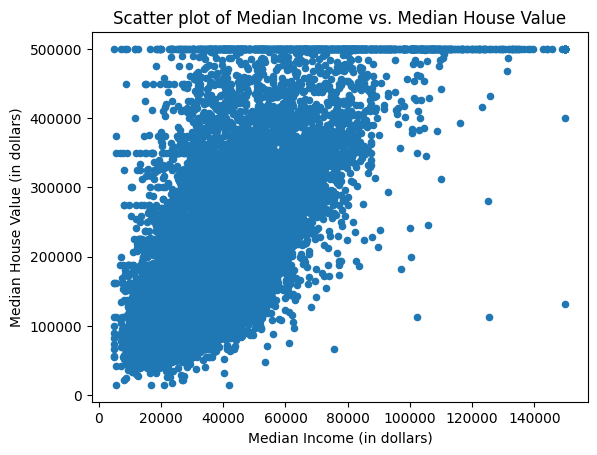

In [ ]:
housing_data["median_income_scaled"] = housing_data["median_income"] * 10000 # 1 ドル単位に変換
housing_data.plot.scatter(
    x = "median_income_scaled",
    y = "median_house_value",
    title = "Scatter plot of Median Income vs. Median House Value",
    xlabel = "Median Income (in dollars)",
    ylabel = "Median House Value (in dollars)"
)

### 回帰分析のデモ

In [ ]:
from statsmodels.regression.linear_model import OLS

housing_data["intercept"] = 1 # 定数項用のカラムを追加
housing_data.columns
OLS(
    housing_data["median_house_value"],
    housing_data[["intercept", "total_rooms"]],
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     296.8
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           6.08e-66
Time:                        11:06:30   Log-Likelihood:            -2.2221e+05
No. Observations:               17000   AIC:                         4.444e+05
Df Residuals:                   16998   BIC:                         4.444e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    1.889e+05   1386.257    136.249      0.000    1.86e+05    1.92e+05
total_rooms     6.9694      0.405     17.227      0.000       6.176       7.762
==============================================================================
Omnibus:                     2048.651   Durbin-Watson:                   0.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2865.772
Skew:                           0.989   Prob(JB):                         0.00
Kurtosis:                       3.369   Cond. No.                     5.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""